# 一阶段定价模型

设有0,1两期。设股价在$0$期为$S$，设在1期有概率分为两种情况，上升情况下取$uS$，概率为$q$，下降情况为$dS$，概率为$1-q$。满足$u > 1 > d$。
无风险利率为$r$，设$R = 1 + r$简化公式。设$C_u = \max(0,uS - K),C_d = \max(0,dS - K)$其中$K$是期权标出的执行价格。
取$\max(0,x)$是因为可以不执行。

容易想到的一个期权定价方法是$C = (C_u q + C_d q)R^{-1}$，即1期期望收益折现到现期为价格。这个定价方法的缺陷是没有考虑波动元素，
对于投资期权来说，期权收益本身波动还是小更受偏好（然而对应股价的波动却是越大期权收益越高，同时方差也增长的比“相应水平”低）。

我们希望从期望与方差相称个各个二元组中选择一个为期权定价。每指定一个定价$C$，显然可以得到一个收益率期望和收益率方差。定价取得越高，
收益率期望下降，方差则不一定。

我们对它与资本市场线的关系特别感兴趣，因为资本市场线上的所有点似乎反映了某种意义上公平的收益期望与标准差的比例。

In [22]:
R_f <- 0.05
beta <- 0.1

sigma <- seq(0,3,0.1)
expect <- R_f + beta * sigma

In [10]:
S <- 10
u <- 1.1
d <- 0.9
K <- 10.5

C_u <- max(0,S*u - K)
C_d <- max(0,S*d - K)

q <- 0.45
R <- 1.05

ES1 <- C_u * q + C_d * (1-q)
VarS1 <- C_u^2 * q + C_d^2 * (1-q) - ES1^2



In [11]:
ES1

[1] 0.225

In [12]:
VarS1

[1] 0.061875

In [13]:
ES1/R

[1] 0.2142857

In [16]:
C <- seq(0.1,1,0.01)

r_u <- (C_u - C)/C
r_d <- (C_d - C)/C

Er <- r_u * q + r_d * (1-q)
Varr <- r_u^2 * q + r_d^2 * (1-q) - Er^2
Sdr <- sqrt(Varr)

In [24]:
head(Er)

[1] 1.2500000 1.0454545 0.8750000 0.7307692 0.6071429 0.5000000

In [25]:
head(Sdr)

[1] 2.487469 2.261335 2.072890 1.913437 1.776763 1.658312

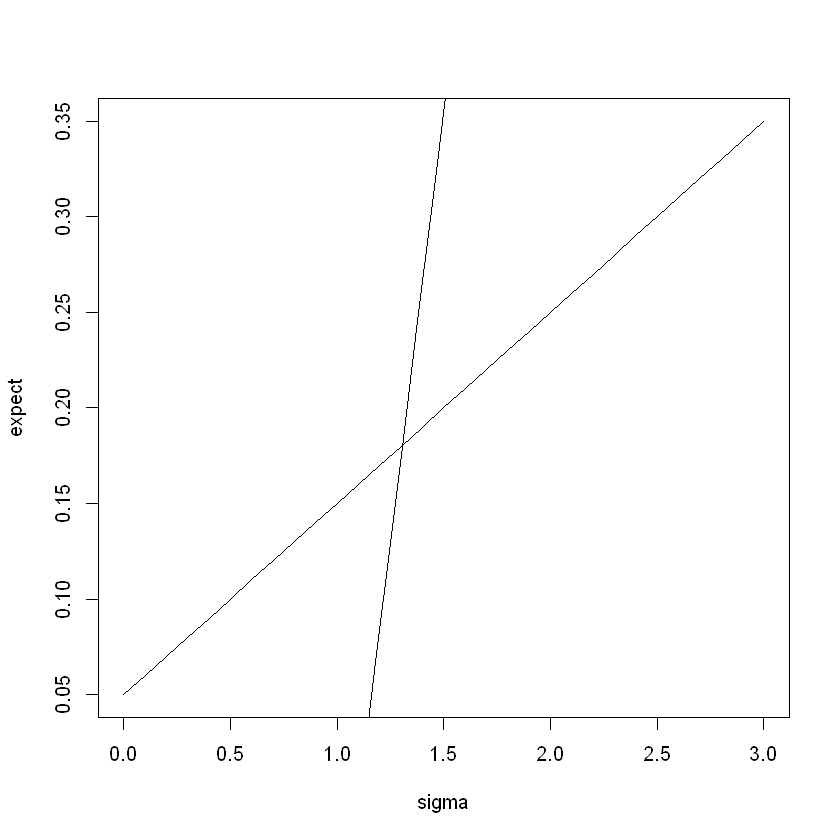

In [23]:
plot(sigma,expect,'l')
lines(Sdr,Er)

In [32]:
mod <- lm(Er ~ Sdr , data=data.frame(Sdr = Sdr, Er = Er))
coef <- mod$coefficients

coef

(Intercept)         Sdr 
  -1.000000    0.904534

$$
\begin{cases}
&r_f + &\beta x  &= y \\
&b_0 + &b_1 x &= y
\end{cases}
$$

In [36]:
solve(matrix(c(1,1,-beta,-coef[2]),2),c(R_f,coef[1]))

[1] 0.1805103 1.3051033

In [37]:
C

[1] 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24
[16] 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39
[31] 0.40 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54
[46] 0.55 0.56 0.57 0.58 0.59 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
[61] 0.70 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84
[76] 0.85 0.86 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99
[91] 1.00

In [42]:
C[which(abs(Er - 0.18) == min(abs(Er - 0.18)))]

[1] 0.19

可以看到根据与资本市场线交点原则推导出来的定价大约为0.19（偏低一点），比直接折价的0.214低。这是因为为了抵偿其风险，
必须降低定价以提供风险溢价（0.214那个是零溢价）直到“公平”的程度，比如资本市场线给定的水平。

假如资本市场线只由无风险利率（债券）和一家股票（期权面向的那家）所生成。我们可以完全仿照上面的方法进行定价。或者再换一个原则，
该原则要求期权的定价使得期初与期末价值在股价可能出现的所有情况中，与债券和股票的某种组合相同。由于所有这些组合在资本市场线上，
所以都是“公平”的，所以所有情况下的期权也是“公平”的（因为仅从随机变量特性上看，是区分不了如此定价的期权和某个债券股票组合的。
它们当然共享相同的期末价值期望与方差，也共享相同的收益率期望与标准差，从而使得如此定价的期权也在资本市场线上。

由于上面的图似乎告诉我们资本市场线与期权的那个线只可能有一个交点（证明只需要推导出那个线是线性的即可，挺麻烦的就不证了），
所以只有一个定价可以使得期权具有与资本市场线相同的收益率期望，标准差对。由于上面原则下求出的定价也有这个性质。
所以两个原则给出的应该是相同的定价。

虽然求出来的是相同的，但它们的计算过程不同，也许后者更简单一点，这就是广为所知的期权定价公式。

# 多阶段期权定价公式

## 价值树叶重合观点

二项式模型下的股价张开一个树，从初始向终止，节点每“层”增加一个。每个状态的函数，如那个状态的股价可以定义出一个（节点带一个值）的树。
其中$q$的改变可以生成不同的当前层概率树（树节点上的数表示转移到当前层时转移到本节点的概率。）。但对股价状态树没有影响。
对于股票和债券的组合而言，不同的购入股数和债券数也产生不同的价值树，$q$的改变并不影响价值树，而是会影响各层价值或收益率的期望和方差等。
对于期权也可以根据$K，C$产生不同的价值树。$q$同样不影响期权的价值数。

让我们展开一些树看看

In [71]:
value.share <- function(omega, S = 10, u = 1.1, d = 0.9, level = 10){

    mat <- matrix(rep(NA,level^2),level)

    for(j in 1:level){
        for(i in 1:j){
            mat[i,j] <- omega * S * u^(i-1) * d^(j-i)
        }
    }
    return(mat)
}

value.share(1)

10,9,8.1,7.29,6.561,5.9049,5.31441,4.782969,4.304672,3.874205
NA,11,9.9,8.91,8.019,7.2171,6.49539,5.845851,5.261266,4.735139
NA,NA,12.1,10.89,9.801,8.8209,7.93881,7.144929,6.430436,5.787392
NA,NA,NA,13.31,11.979,10.7811,9.70299,8.732691,7.859422,7.073480
NA,NA,NA,NA,14.641,13.1769,11.85921,10.673289,9.605960,8.645364
NA,NA,NA,NA,NA,16.1051,14.49459,13.045131,11.740618,10.566556
NA,NA,NA,NA,NA,NA,17.71561,15.944049,14.349644,12.914680
NA,NA,NA,NA,NA,NA,NA,19.487171,17.538454,15.784609
NA,NA,NA,NA,NA,NA,NA,NA,21.435888,19.292299
NA,NA,NA,NA,NA,NA,NA,NA,NA,23.579477


上面矩阵向右走表示下跌，向右下走表示上涨。这是只买股票的价值树。

In [68]:
value.debt <- function(B ,R = 1.01 ,level = 10){

    mat <- matrix(rep(NA,level^2),level)

    for(j in 1:level){
        for(i in 1:j){
            mat[i,j] <- B * R^(j-1)
        }
    }
    return(mat)
}

value.debt(10)

10,10.1,10.201,10.30301,10.40604,10.5101,10.6152,10.72135,10.82857,10.93685
NA,10.1,10.201,10.30301,10.40604,10.5101,10.6152,10.72135,10.82857,10.93685
NA,NA,10.201,10.30301,10.40604,10.5101,10.6152,10.72135,10.82857,10.93685
NA,NA,NA,10.30301,10.40604,10.5101,10.6152,10.72135,10.82857,10.93685
NA,NA,NA,NA,10.40604,10.5101,10.6152,10.72135,10.82857,10.93685
NA,NA,NA,NA,NA,10.5101,10.6152,10.72135,10.82857,10.93685
NA,NA,NA,NA,NA,NA,10.6152,10.72135,10.82857,10.93685
NA,NA,NA,NA,NA,NA,NA,10.72135,10.82857,10.93685
NA,NA,NA,NA,NA,NA,NA,NA,10.82857,10.93685
NA,NA,NA,NA,NA,NA,NA,NA,NA,10.93685


这是只买债券的价值树，可以看出尽管它其实不受股价变动的影响，我们还是分配给每个股价状态一个对应的债券价值。

In [75]:
value.comb <- function(omega, B, S = 10, u = 1.1, d = 0.9, R = 1.01, level = 10){
    mat.share <- value.share(omega, S = S, u = u, d = d, level = level)
    mat.debt <- value.debt(B, R = R, level = level)
    return(mat.share + mat.debt)
}

value.comb(1, 10)

20,19.1,18.301,17.59301,16.96704,16.4150,15.92961,15.50432,15.13324,14.81106
NA,21.1,20.101,19.21301,18.42504,17.7272,17.11059,16.56720,16.08983,15.67199
NA,NA,22.301,21.19301,20.20704,19.3310,18.55401,17.86628,17.25900,16.72425
NA,NA,NA,23.61301,22.38504,21.2912,20.31819,19.45404,18.68799,18.01033
NA,NA,NA,NA,25.04704,23.6870,22.47441,21.39464,20.43453,19.58222
NA,NA,NA,NA,NA,26.6152,25.10979,23.76648,22.56918,21.50341
NA,NA,NA,NA,NA,NA,28.33081,26.66540,25.17821,23.85153
NA,NA,NA,NA,NA,NA,NA,30.20852,28.36702,26.72146
NA,NA,NA,NA,NA,NA,NA,NA,32.26446,30.22915
NA,NA,NA,NA,NA,NA,NA,NA,NA,34.51633


这是某个股票，债券组合的价值树。

In [70]:
prob.tree <- function(q, level = 10){
    mat <- matrix(rep(NA,level^2),level)

    for(j in 1:level){
        for(i in 1:j){
            mat[i,j] <- choose(j-1,i-1) * (1-q)^(j-i) * q^(i-1)
        }
    }
    return(mat)
}

prob.tree(0.45)

1,0.55,0.3025,0.166375,0.09150625,0.05032844,0.027680641,0.015224352,0.008373394,0.0046053666
NA,0.45,0.4950,0.408375,0.29947500,0.20588906,0.135886781,0.087194018,0.054807668,0.0339122448
NA,NA,0.2025,0.334125,0.36753750,0.33690938,0.277950234,0.214021680,0.156949232,0.1109855286
NA,NA,NA,0.091125,0.20047500,0.27565313,0.303218438,0.291847746,0.256826017,0.2118814637
NA,NA,NA,NA,0.04100625,0.11276719,0.186065859,0.238784520,0.262662971,0.2600363418
NA,NA,NA,NA,NA,0.01845281,0.060894281,0.117221491,0.171924854,0.2127570069
NA,NA,NA,NA,NA,NA,0.008303766,0.031969498,0.070332895,0.1160492765
NA,NA,NA,NA,NA,NA,NA,0.003736695,0.016441456,0.0406926034
NA,NA,NA,NA,NA,NA,NA,NA,0.001681513,0.0083234871
NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0007566806


这是$q=0.45$的概率树。

有了这些，我们可以看看不同概率树下的各层的期望。

In [80]:
apply(prob.tree(0.45) * value.comb(1, 10),2,sum,na.rm=TRUE)

[1] 20.00000 20.00000 20.00200 20.00600 20.01200 20.02000 20.03000 20.04201
 [9] 20.05601 20.07203

In [82]:
sqrt(apply(prob.tree(0.45) * value.comb(1, 10)^2,2,sd,na.rm=TRUE) - apply(prob.tree(0.45) * value.comb(1, 10),2,sd,na.rm=TRUE) )

Warning message in sqrt(apply(prob.tree(0.45) * value.comb(1, 10)^2, 2, sd, na.rm = TRUE) - :
"产生了NaNs"

[1]       NA      NaN 7.366522 7.377643 7.155353 6.907289 6.673021 6.460288
 [9] 6.268953 6.096895

In [98]:
apply(prob.tree(0.45, level=3) * value.comb(1, 10, level = 3, u = 1.2),2,sum,na.rm=TRUE)

[1] 20.00000 20.45000 20.91325

In [100]:
value.comb(1, 10, level = 2, u = 1.2)

20,19.1
NA,22.1


In [111]:
value.option <- function(K, S = 10, u = 1.1, d = 0.9, level = 10){
    mat.share <- value.share(1, S = S, u = u, d = d, level = level)
    return(matrix(pmax(0,mat.share - K),level))
}

In [112]:
value.option(10)

0,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,1,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,2.1,0.89,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,3.31,1.979,0.7811,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,NA,4.641,3.1769,1.85921,0.673289,0.000000,0.0000000
NA,NA,NA,NA,NA,6.1051,4.49459,3.045131,1.740618,0.5665561
NA,NA,NA,NA,NA,NA,7.71561,5.944049,4.349644,2.9146797
NA,NA,NA,NA,NA,NA,NA,9.487171,7.538454,5.7846085
NA,NA,NA,NA,NA,NA,NA,NA,11.435888,9.2922993
NA,NA,NA,NA,NA,NA,NA,NA,NA,13.5794769


这个有点美式期权的价格各个价格状态的价值的意思。看样子期权和股票债券组合的模式相差甚远，它们真能重合？

根据一阶段定价公式求出的可以和其对应的买入股数$\omega$与债券持有$B$关系：

$$
\omega = \frac{C_u - C_d}{(u-d)S} \\
B = \frac{uC_d - dC_u}{(u-d)R}
$$

In [117]:
S <- 10
u <- 1.1
d <- 0.9
R <- 1.01
level <- 2

mat <- value.option(10, S = S, u = u, d = d, level = level)
mat

0,0
NA,1


In [118]:
C_u <- mat[2,2]
C_d <- mat[1,2]

omega <- (C_u - C_d)/(u - d)/S
B <- (u*C_d - d*C_u)/(u - d)/R

In [119]:
omega

[1] 0.5

In [120]:
B

[1] -4.455446

In [125]:
value.comb(omega, B, S = S, u = u, d = d, R = R, level = level)

0.5445545,0
NA,1


的确可以相等，当然内在价值等不上了，不然可以直接按那个求，显然就没有意义了。这是(1,1)项就是我们的定价。验证一阶段直接定价公式

$$
C = R^{-1} ( pC_u + (1-p)C_d ) \\
p = \frac{R - d}{u - d}
$$

In [127]:
p <- (R - d)/(u - d)

In [128]:
1/R*(p*C_u + (1-p)*C_d)

[1] 0.5445545

的确对的上，这就是说它的定价是通过找到资本市场线上与其在价值树叶子上等价的组合——借入债券4.45单位，
买入0.5股，在第一轮的价值（价格）来实现的。

根据这个一阶段的处理模式，我们可以地从多阶段的期权（执行）价值树叶子求得之前期权价值树各个节点的值。递归的执行回去。
我们注意到计算中很多项可以复用，比如$p$

期权执行价值树与期权价值树的叶子是重合的。而在每个$(2,2)$小三角矩阵上，有一个组合价值树与期权价值树是完全重合的（局部使用一阶段定价公式）。

In [131]:
mat <- value.option(10, S = S, u = u, d = d, level = 10)
mat

0,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,1,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,2.1,0.89,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,3.31,1.979,0.7811,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,NA,4.641,3.1769,1.85921,0.673289,0.000000,0.0000000
NA,NA,NA,NA,NA,6.1051,4.49459,3.045131,1.740618,0.5665561
NA,NA,NA,NA,NA,NA,7.71561,5.944049,4.349644,2.9146797
NA,NA,NA,NA,NA,NA,NA,9.487171,7.538454,5.7846085
NA,NA,NA,NA,NA,NA,NA,NA,11.435888,9.2922993
NA,NA,NA,NA,NA,NA,NA,NA,NA,13.5794769


In [156]:
value.mat <- mat

for(j in 9:1){
    for(i in 1:j){
        C_u <- value.mat[i+1,j+1]
        C_d <- value.mat[i,j+1]
        value.mat[i,j] <- 1/R*(p*C_u + (1-p)*C_d)
    }
}
value.mat

1.631695,0.9214627,0.432282,0.1485301,0.02712998,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
NA,2.2424614,1.338455,0.6723024,0.25055800,0.04982051,0.00000000,0.0000000,0.0000000,0.0000000
NA,NA,3.022875,1.9078251,1.02958962,0.41935337,0.09148858,0.0000000,0.0000000,0.0000000
NA,NA,NA,3.9901493,2.66106913,1.54759364,0.69523099,0.1680063,0.0000000,0.0000000
NA,NA,NA,NA,5.15012676,3.62047761,2.27311933,1.1392372,0.3085207,0.0000000
NA,NA,NA,NA,NA,6.49529656,4.78868852,3.2421705,1.8396278,0.5665561
NA,NA,NA,NA,NA,NA,8.00970852,6.1410885,4.4486540,2.9146797
NA,NA,NA,NA,NA,NA,NA,9.6842105,7.6374638,5.7846085
NA,NA,NA,NA,NA,NA,NA,NA,11.5348980,9.2922993
NA,NA,NA,NA,NA,NA,NA,NA,NA,13.5794769


In [158]:
mat

0,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,1,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,2.1,0.89,0.000,0.0000,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,3.31,1.979,0.7811,0.00000,0.000000,0.000000,0.0000000
NA,NA,NA,NA,4.641,3.1769,1.85921,0.673289,0.000000,0.0000000
NA,NA,NA,NA,NA,6.1051,4.49459,3.045131,1.740618,0.5665561
NA,NA,NA,NA,NA,NA,7.71561,5.944049,4.349644,2.9146797
NA,NA,NA,NA,NA,NA,NA,9.487171,7.538454,5.7846085
NA,NA,NA,NA,NA,NA,NA,NA,11.435888,9.2922993
NA,NA,NA,NA,NA,NA,NA,NA,NA,13.5794769


我们来验证多阶段定价公式是否与这个结果匹配

$$
C(S,T,K) = R^{-T}E_p(f(S\prod_{i=1}^T Z_i)) \\
f(x) = (x-K)^+ = \max(0,x-K)
$$

In [173]:
sum(dbinom(0:9,9,p) * mat[,10]) * R^(-9)

[1] 1.631695

结果对的上，这就是期权定价模型的原理。总结来说，首先我们根据$K,T,S$展开期权执行价值树，其中叶子与我们所欲求的期权价值树匹配。
然后我们根据期权价值树逐层利用一阶段定价公式反推结果直到最初期。
这相当于不断寻找对当时给定的两个状态上的期权价值相匹配的资本市场线上的等价组合，并以组合的价格给其上一阶段定价，这么不断做下去，
就可以得到最初的价格。

# 风险中立概率

在每个利用两个后阶段价值得到前阶段价值的小操作中，除了后两个阶段的价值，其他参数都是确定的。除了$R$以外，信息包含在所谓风险中立概率$p$中
$$
p = \frac{R - d}{u - d}
$$

上述讨论中，$p$和那个条件期望的写法无非是一种简化公式的记法，和转移概率$q$没什么关系。比如上例中$p=0.55,q=0.45$。那叫它“概率”干吗呢？
毕竟它原文也是 risk neutral measure，和概率没什么关系。